# PA 2: Classification - Nearest Neighbors

# Student Details (1 Point)

**Student Name and ID:    Nithya Balasundar(1001763661)**	<-- Only this student will submit the assignment

**Student Name and ID: 	Vysali Pughazhendi(1001750473)**

Notes: When submitting, fill your name and ID in this cell. [1 point] Do not to forget to cite any external sources used by you.


# Programming  Assignment  Submission  Instructions  (  2 Points)
Step 3: Rename this submission file as 'yourLastName_Last4digitsofyourID_NN.ipynb' [1 point]

Step 4: Place this file inside the folder 'PA#2_Classification_yourLastName' [1 point]


# Programming Assignment Details (25 Points)

For this assignment use Jupyter notebook, Panda, and scikit.

1)	Load wine dataset from sklearn datasets. [1 points]

2)	Split your dataset 70% for training, and 30% for testing the classifier. [2 points]

3)	Select only 2 attributes for training and testing your model. [2 points]

4)	Use Euclidean distance. [3 points]

5)	Test the classifier with three diferent numbers for neighbors and record the results. [3 points]

6)	Use comments to explain your code and variable names.[2 points]

7)	Calculate and print the confusion matrix, and the classification Report (includes:precision, recall, f1-score, and support) for all three different numbers.[6 points]

8)	Plot the classifier in a 2D projection for all three different numbers.[6 points]


# Report (20 Points)

For each classification task you need to submit a report (Microsoft Word, or PDF) that you have to:

1)	Describe the Nearest Neighbors method, [5 points]

2)	Explain what was your criteria for selecting the two attributes, [5 points]

3)	Visualizations of the classifier in a 2D projection, for all three different number of neighbors,[5 points]

4)	Interprete and compare the results.[5 points] Do not to forget to cite your sources!


# Canvas Submission (2 Points)

Step 5 : Submit your zipped folder containing PA#2_Classification_yourLastName (PA#2_Classification_yourLastName.zip) on Canvas


# - - - - - - - - - - - - - - - Solution - - - - - - - - - - - - - - - - - -

# REFERENCES USED:

#https://scikit-learn.org/stable/auto_examples/neighbors/plot_classification.html#sphx-glr%02download-auto-examples-neighbors-plot-classification-py
#https://stackoverflow.com/questions/3674409/how-to-split-partition-a-dataset-into-training-and-test-datasets-for-e-g-cros
#https://www.studocu.com/in/document/jawaharlal-nehru-technological-university-anantapur/computer-science-engineering/mandatory-assignments/k-nearest-neighbor-its-really-helpful-for-the-learners/5402239/view
#https://scipy-lectures.org/packages/scikit-learn/index.html


In [2]:
# data analysis and wrangling
import pandas as pd
from pandas import Series, DataFrame
import numpy as np

# visualization  

import matplotlib.pyplot as plt  # Matplotlib is used for producing basic figures
import seaborn as sns            # seaborn is used for more asthetic visualization  

from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn import datasets
import sklearn.neighbors as sk
from sklearn.model_selection import train_test_split

# 1)Loading the wine data from sklearn dataset

In [7]:
# 1) Load dataset
wine = datasets.load_wine() 
wine_data = pd.DataFrame(wine['data'], columns = wine['feature_names'])
df = DataFrame(wine_data)
df.head(10)


alcohol
malic_acid
ash
alcalinity_of_ash
magnesium
total_phenols
flavanoids
nonflavanoid_phenols
proanthocyanins
color_intensity
hue
od280/od315_of_diluted_wines
proline


In [8]:

#column names
for col in df.columns:
    print(col)

alcohol
malic_acid
ash
alcalinity_of_ash
magnesium
total_phenols
flavanoids
nonflavanoid_phenols
proanthocyanins
color_intensity
hue
od280/od315_of_diluted_wines
proline


The correlation matrix is :
                               alcohol  malic_acid       ash  \
alcohol                       1.000000    0.094397  0.211545   
malic_acid                    0.094397    1.000000  0.164045   
ash                           0.211545    0.164045  1.000000   
alcalinity_of_ash            -0.310235    0.288500  0.443367   
magnesium                     0.270798   -0.054575  0.286587   
total_phenols                 0.289101   -0.335167  0.128980   
flavanoids                    0.236815   -0.411007  0.115077   
nonflavanoid_phenols         -0.155929    0.292977  0.186230   
proanthocyanins               0.136698   -0.220746  0.009652   
color_intensity               0.546364    0.248985  0.258887   
hue                          -0.071747   -0.561296 -0.074667   
od280/od315_of_diluted_wines  0.072343   -0.368710  0.003911   
proline                       0.643720   -0.192011  0.223626   

                              alcalinity_of_ash  magnesium  total_phenols  

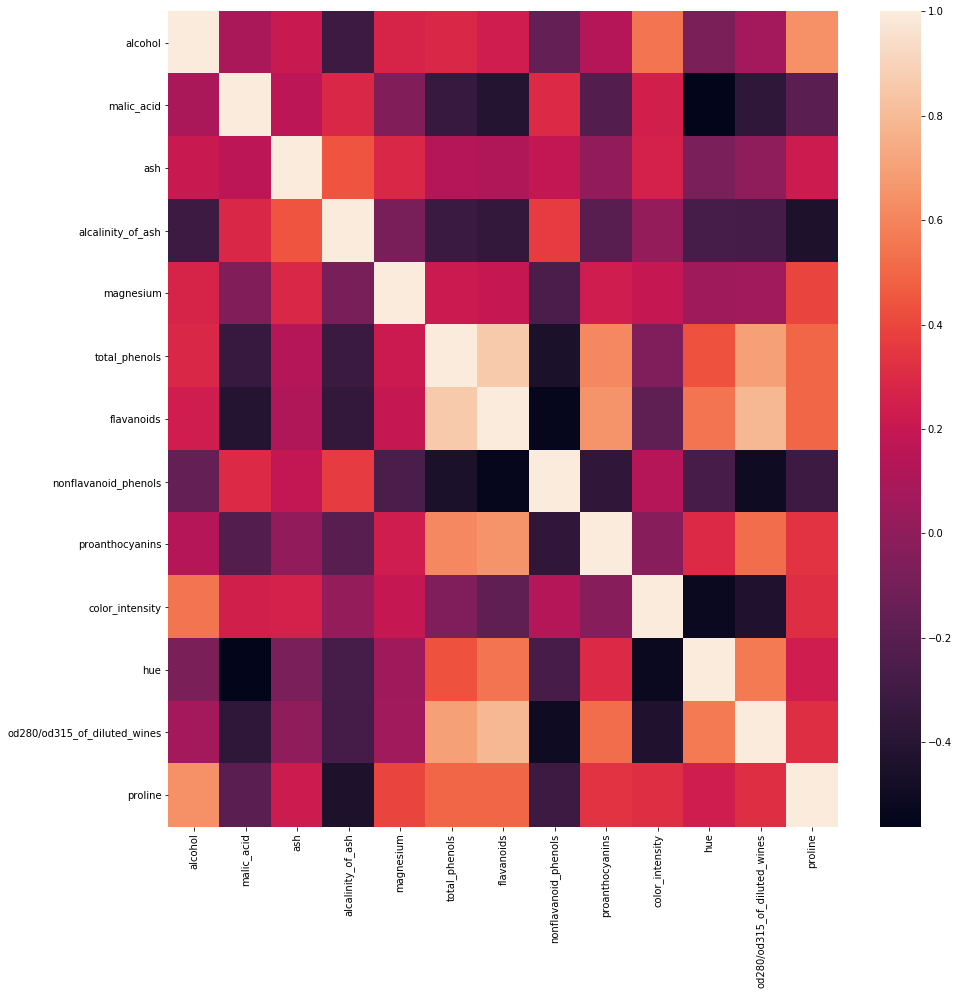

In [6]:
# loading them into dataframe and adding column names to them

wine_data = pd.DataFrame(wine['data'], columns = wine['feature_names'])
df = DataFrame(wine_data)


# Correlation between each attribute(used to determine which two attributes can be selected for split)
print('The correlation matrix is :')
print(wine_data.corr())
plt.figure(figsize= (15,15))
sns.heatmap(df.corr())


# 2)and 3) Split your dataset 70% for training, and 30% for testing the classifier and selecting 2 best attributes



In [4]:
#Select only 2 attributes for training and testing your model
# Here we have selected the first 2 attributes - Alocohol and Malic acid
x_train, x_test, y_train, y_test = train_test_split(wine.data[:, :2],wine.target,train_size = 0.7,test_size = 0.3,random_state=1)

# plotting a graph for a range of k values( 1 to 25)

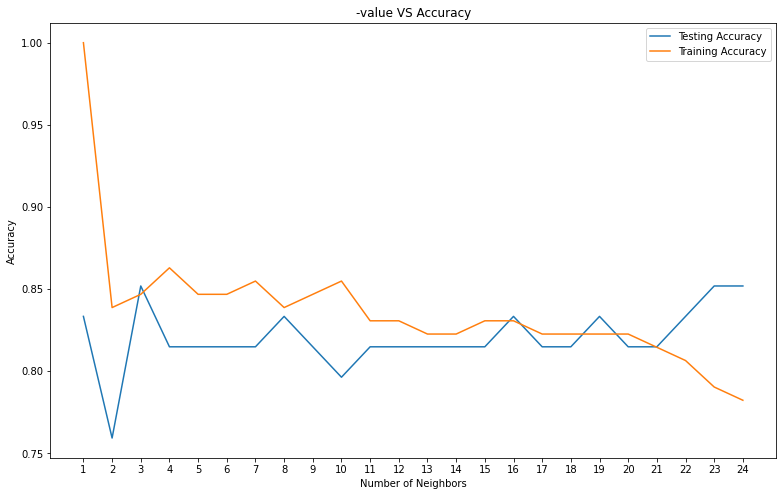

Best accuracy is 0.8518518518518519 with K = 3


In [6]:

neig = np.arange(1, 25)
train_accuracy = []
test_accuracy = []

# Loop over different values of k
for i, k in enumerate(neig):
    # k from 1 to 25(exclude)
    knn = KNeighborsClassifier(n_neighbors=k)
    # Fit with knn
    knn.fit(x_train,y_train)
    #train accuracy
    train_accuracy.append(knn.score(x_train,y_train))
    # test accuracy
    test_accuracy.append(knn.score(x_test,y_test))

# Plot
plt.figure(figsize=[13,8])
plt.plot(neig, test_accuracy, label = 'Testing Accuracy')
plt.plot(neig, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.title('-value VS Accuracy')
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.xticks(neig)
plt.show()
print("Best accuracy is {} with K = {}".format(np.max(test_accuracy),1+test_accuracy.index(np.max(test_accuracy))))

# 4) and 5)Using Euclidean distance as a metric for classification in KNN and testing for different values of k (3,8,23)

# k = 3

In [7]:

# Finding Accuracy
# Creating a Knn Classifier
knn = KNeighborsClassifier(n_neighbors = 3, weights='uniform', metric='euclidean')

# Training the model using the 70% training dataset
knn.fit(x_train,y_train)

prediction = knn.predict(x_test)

train_acc_knn = knn.score(x_train,y_train) *100

# predicting the accuracy score for test dataset
test_acc_knn = knn.score(x_test,y_test) *100

print('Accuracy For test dataset where K=3 ',test_acc_knn)

Accuracy For test dataset where K=3  85.18518518518519


# Confusion matrix and Classification Report for K=3

In [19]:
# confusion matrix for k = 3
from sklearn.metrics import classification_report, confusion_matrix
cm = confusion_matrix(y_test,prediction)
print('Confusion matrix  where K=3 : \n',cm)

print("\n")
# classification Report for k = 3

print('Classification report  where K=3 : \n',classification_report(y_test,prediction))

Confusion matrix  where K=3 : 
 [[20  0  3]
 [ 1 18  0]
 [ 3  1  8]]


Classification report  where K=3 : 
               precision    recall  f1-score   support

           0       0.83      0.87      0.85        23
           1       0.95      0.95      0.95        19
           2       0.73      0.67      0.70        12

    accuracy                           0.85        54
   macro avg       0.84      0.83      0.83        54
weighted avg       0.85      0.85      0.85        54



# k=8

In [68]:

# Finding Accuracy

from sklearn.neighbors import KNeighborsClassifier

# Creating a Knn Classifier
knn = KNeighborsClassifier(n_neighbors = 8, weights='uniform', metric='euclidean')

# Training the model using the 70% training dataset
knn.fit(x_train,y_train)

prediction = knn.predict(x_test)

train_acc_knn = knn.score(x_train,y_train) *100

# predicting the accuracy score for test dataset
test_acc_knn = knn.score(x_test,y_test) *100

print('Accuracy For test dataset  where K=8 : ',test_acc_knn)

Accuracy For test dataset  where K=8 :  83.33333333333334


# Confusion matrix and Classification Report for K=8

In [69]:
# 7) Calculate and print the confusion matrix, and the classification Report (includes:precision, recall, f1-score, and support) for all three different numbers

# confusion matrix for k = 
from sklearn.metrics import classification_report, confusion_matrix
cm = confusion_matrix(y_test,prediction)
print('Confusion matrix  where K=8 : \n',cm)

print("\n")
# classification Report for k = 8

print('Classification report  where K=8 : \n',classification_report(y_test,prediction))


Confusion matrix  where K=8 : 
 [[21  0  2]
 [ 2 17  0]
 [ 4  1  7]]


Classification report  where K=8 : 
               precision    recall  f1-score   support

           0       0.78      0.91      0.84        23
           1       0.94      0.89      0.92        19
           2       0.78      0.58      0.67        12

    accuracy                           0.83        54
   macro avg       0.83      0.80      0.81        54
weighted avg       0.84      0.83      0.83        54



# k=20

In [17]:
#Finding Accuracy
from sklearn.neighbors import KNeighborsClassifier

# Creating a Knn Classifier
knn = KNeighborsClassifier(n_neighbors = 20, weights='uniform', metric='euclidean')

# Training the model using the 70% training dataset
knn.fit(x_train,y_train)

prediction = knn.predict(x_test)

train_acc_knn = knn.score(x_train,y_train) *100

# predicting the accuracy score for test dataset
test_acc_knn = knn.score(x_test,y_test) *100

print('Accuracy For test dataset  where K=23 : ',test_acc_knn)

Accuracy For test dataset  where K=23 :  81.48148148148148


# Confusion matrix and Classification Report for K=20

In [18]:
# 7) Calculate and print the confusion matrix, and the classification Report (includes:precision, recall, f1-score, and support) for all three different numbers

# confusion matrix for k = 20
from sklearn.metrics import classification_report, confusion_matrix
cm = confusion_matrix(y_test,prediction)
print('Confusion matrix  where K=20: \n',cm)

print("\n")
# classification Report for k = 20

print('Classification report  where K=20: \n',classification_report(y_test,prediction))


Confusion matrix  where K=20: 
 [[20  0  3]
 [ 2 17  0]
 [ 3  2  7]]


Classification report  where K=20: 
               precision    recall  f1-score   support

           0       0.80      0.87      0.83        23
           1       0.89      0.89      0.89        19
           2       0.70      0.58      0.64        12

    accuracy                           0.81        54
   macro avg       0.80      0.78      0.79        54
weighted avg       0.81      0.81      0.81        54



# 5)Accuracy Results

In [20]:
from IPython.display import HTML, display

data = [['K','ACCURACY'],
        [3,85.18518518518519],
        [8,83.33333333333334],
        [20,81.48148148148148],
        ]

display(HTML(
   '<table><tr>{}</tr></table>'.format(
       '</tr><tr>'.join(
           '<td>{}</td>'.format('</td><td>'.join(str(_) for _ in row)) for row in data)
       )
))



K,ACCURACY
3,85.18518518518519
8,83.33333333333334
20,81.48148148148148


# 8)Classifier in 2d projection for  three different k values

# Data Visualization for K=3

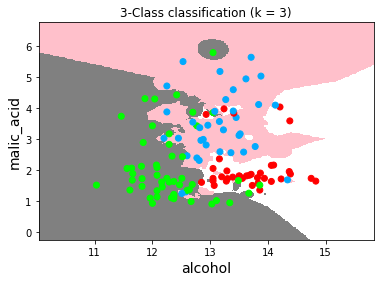

In [21]:
import matplotlib


import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets

# import some data to play with
wine = datasets.load_wine()
n_neighbors=3

# take the first two features
X = wine.data[:, :2]
y = wine.target
h = .02  # step size in the mesh

# we create an instance of Neighbours Classifier and fit the data.
clf = neighbors.KNeighborsClassifier(n_neighbors, weights='distance')
clf.fit(X, y)

# Create color maps
cmap_light = ListedColormap(['white','gray', 'pink'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00','#00AAFF'])

# Calculate min, max and limits
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# predict class using data and kNN classifier
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Plot also the training points
plt.scatter(x_train[:, 0], x_train[:, 1], c=y_train, cmap=cmap_bold)
plt.xlim(xx.min(), xx.max())

plt.ylim(yy.min(), yy.max())
plt.xlabel('alcohol', fontsize= 14)
plt.ylabel('malic_acid', fontsize= 14)
plt.title("3-Class classification (k = %i)" % (n_neighbors))
plt.show()


# Data Visualization for K=8

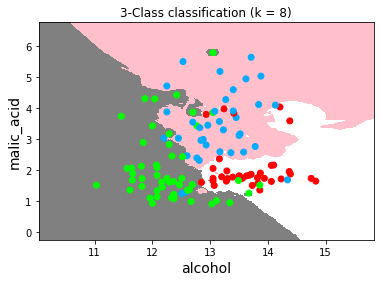

In [15]:
import matplotlib
import matplotlib

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets

# import some data to play with
wine = datasets.load_wine()
n_neighbors=8

# take the first two features
X = wine.data[:, :2]
y = wine.target
h = .02  # step size in the mesh

# we create an instance of Neighbours Classifier and fit the data.
clf = neighbors.KNeighborsClassifier(n_neighbors, weights='distance')
clf.fit(X, y)

# Create color maps
cmap_light = ListedColormap(['white','gray', 'pink'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00','#00AAFF'])

# Calculate min, max and limits
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# predict class using data and kNN classifier
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Plot also the training points
plt.scatter(x_train[:, 0], x_train[:, 1], c=y_train, cmap=cmap_bold)
plt.xlim(xx.min(), xx.max())

plt.ylim(yy.min(), yy.max())
plt.xlabel('alcohol', fontsize= 14)
plt.ylabel('malic_acid', fontsize= 14)
plt.title("3-Class classification (k = %i)" % (n_neighbors))
plt.show()


# Data Visualization for K=20

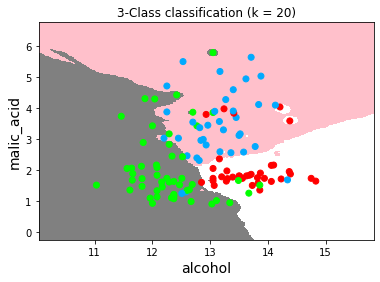

In [22]:
import matplotlib
import matplotlib

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets

# import some data to play with
wine = datasets.load_wine()
n_neighbors=20

# take the first two features
X = wine.data[:, :2]
y = wine.target
h = .02  # step size in the mesh

# we create an instance of Neighbours Classifier and fit the data.
clf = neighbors.KNeighborsClassifier(n_neighbors, weights='distance')
clf.fit(X, y)

# Create color maps
cmap_light = ListedColormap(['white','gray', 'pink'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00','#00AAFF'])

# Calculate min, max and limits
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# predict class using data and kNN classifier
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Plot also the training points
plt.scatter(x_train[:, 0], x_train[:, 1], c=y_train, cmap=cmap_bold)
plt.xlim(xx.min(), xx.max())


plt.ylim(yy.min(), yy.max())
plt.xlabel('alcohol', fontsize= 14)
plt.ylabel('malic_acid', fontsize= 14)
plt.title("3-Class classification (k = %i)" % (n_neighbors))
plt.show()


In [9]:
#target data
print(wine.target_names)


['class_0' 'class_1' 'class_2']


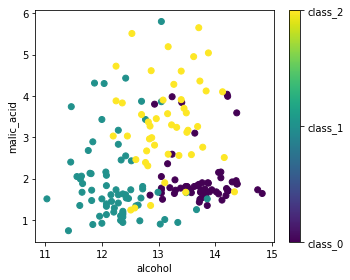

In [80]:

#Visualising the wine data set with target labels 
# Load the data
from sklearn.datasets import load_wine
wine = load_wine()
from matplotlib import pyplot as plt

# The indices of the features that we are plotting
x_index = 0
y_index = 1

# this formatter will label the colorbar with the correct target names
formatter = plt.FuncFormatter(lambda i, *args: wine.target_names[int(i)])

plt.figure(figsize=(5, 4))
plt.scatter(wine.data[:, x_index], wine.data[:, y_index], c=wine.target)
plt.colorbar(ticks=[0, 1, 2], format=formatter)
plt.xlabel(wine.feature_names[x_index])
plt.ylabel(wine.feature_names[y_index])

plt.tight_layout()
plt.show()